In [1]:
# Funktion der kan bruges til at installere manglende packages
import subprocess
import sys

def install(package):
    subprocess.check_call([sys.executable, "-m", "pip", "install", package])

# Installér fasttext
install('fasttext')

In [2]:
import fasttext

from tqdm.notebook import tqdm

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
# Træn modellen ud fra givne parameter
epoch = 50
model = fasttext.train_supervised(input="test.train", epoch=epoch, lr=0.5, wordNgrams=2, bucket=200000, dim=100, loss='ova')

In [4]:
# Funktion til at formattere testresultatet af modellen for pænere visning
def print_result(N, p, r):
    print('Samples\t\t' + str(N))
    print('Precision\t{:.3f}'.format(p))
    print('Recall\t\t{:.3f}\n'.format(r))

print('-- Training')
print_result(*model.test('test.train'))

print('-- Validation')
print_result(*model.test('test.valid'))

-- Training
Samples		4998
Precision	1.000
Recall		1.000

-- Validation
Samples		2229
Precision	0.819
Recall		0.819



In [9]:
models_train = []
models_valid = []
model_valid_epoch = 0
model_valid_peak = 0.0

with tqdm(total=epoch) as progress:
    print('        ', 'Training', '     | ', 'Validation')
    print('        ', 'Prec.', 'Recall  | ', 'Prec.', 'Recall')
    
    for i in range(epoch):
        progress.update(1)

        model = fasttext.train_supervised(input="test.train", epoch=i)
        models_train.append(model.test('test.train', k=2))
        models_valid.append(model.test('test.valid', k=2))
        
        if (models_valid[i][1] > model_valid_peak):
            model_valid_peak = models_valid[i][1]
            model_valid_epoch = i+1
            precision = '\033[92mHigher\033[0m'
        else:
            precision = '\033[91mLower\033[0m'
        
        print('{0:2}'.format(i+1), ' ==> ', '{:.3f}'.format(models_train[i][1]), ' {:.3f}'.format(models_train[i][2]),
              ' |', ' {:.3f}'.format(models_valid[i][1]), ' {:.3f}'.format(models_valid[i][2]), ' ==> ', precision)

    print('\n    -->  Epoch peaked at', '\033[1m' + '\033[94m' + str(model_valid_epoch))

         Training      |  Validation
         Prec. Recall  |  Prec. Recall
 1  ==>  0.040  0.079  |  0.041  0.083  ==>  Higher
 2  ==>  0.433  0.865  |  0.424  0.848  ==>  Higher
 3  ==>  0.443  0.886  |  0.433  0.866  ==>  Higher
 4  ==>  0.452  0.904  |  0.442  0.885  ==>  Higher
 5  ==>  0.457  0.915  |  0.446  0.892  ==>  Higher
 6  ==>  0.464  0.928  |  0.451  0.902  ==>  Higher
 7  ==>  0.466  0.931  |  0.454  0.908  ==>  Higher
 8  ==>  0.469  0.937  |  0.456  0.913  ==>  Higher
 9  ==>  0.470  0.939  |  0.458  0.916  ==>  Higher
10  ==>  0.471  0.943  |  0.459  0.919  ==>  Higher
11  ==>  0.474  0.948  |  0.461  0.922  ==>  Higher
12  ==>  0.475  0.951  |  0.461  0.921  ==>  Lower
13  ==>  0.477  0.953  |  0.461  0.921  ==>  Lower
14  ==>  0.478  0.955  |  0.461  0.922  ==>  Higher
15  ==>  0.478  0.957  |  0.461  0.923  ==>  Higher
16  ==>  0.480  0.959  |  0.462  0.925  ==>  Higher
17  ==>  0.481  0.963  |  0.463  0.925  ==>  Higher
18  ==>  0.482  0.963  |  0.463  0.926  ==

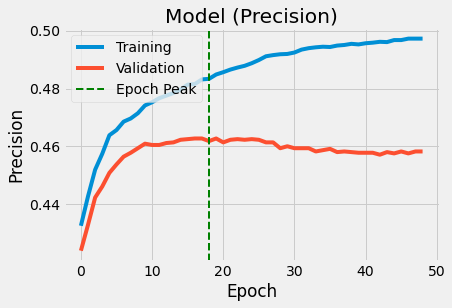

In [14]:
# Visualisér modellens præcision
threshold = 0.2

plt.plot([pr[1] for pr in models_train if pr[1] > threshold], label='Training')
plt.plot([pr[1] for pr in models_valid if pr[1] > threshold], label='Validation')
plt.axvline(model_valid_epoch, linewidth=2, color='g', linestyle='--', label=('Epoch Peak'))

plt.title('Model (Precision)')
plt.ylabel('Precision')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

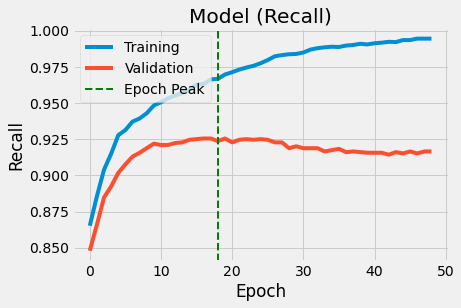

In [17]:
# Visualisér modellens recall
threshold = 0.8

plt.plot([pr[2] for pr in models_train if pr[2] > threshold], label='Training')
plt.plot([pr[2] for pr in models_valid if pr[2] > threshold], label='Validation')
plt.axvline(model_valid_epoch, linewidth=2, color='g', linestyle='--', label=('Epoch Peak'))

plt.title('Model (Recall)')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

In [ ]:
# Note: Check om Threshold holder? Betyder det at antallet af epochs i plotdiagrammer forskydes?